In [1]:
from utils_spatial import * 

In [2]:
# Get dictionary
dictionary = get_dictionary(collection='census')


## Level 0

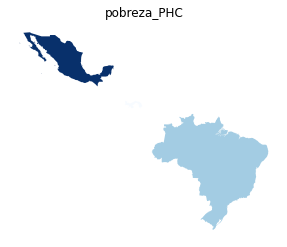

In [9]:
world_level_0 = get_basemap(level='0')

for indicator in ['pobreza_PHC']:
    indicators  = get_indicators(collection='census', level='0')

    # filter indicator
    data = indicators[(indicators.indicator==indicator) & 
                        (indicators.year==2010) &
                        (indicators.area == 'Total') & (indicators.quintile == 'Total') &
                        (indicators.sex == 'Total') & (indicators.education_level == 'Total') &
                        (indicators.age == 'Total') & (indicators.ethnicity == 'Total') ]
    world_level_0_map = world_level_0.merge(data, on='isoalpha3', how="left")
    world_level_0_map = world_level_0_map.loc[~(world_level_0_map.value.isna())]

    metadata = dictionary[dictionary.indicator == indicator + '_PHC']
    if len(metadata)==0:
        label = indicator
    else:
        label = metadata['label_es']

    fig, ax = plt.subplots(1, 1)
    ax.set_axis_off();
    ax.set_title(label)
    ax.set_axis_off();
    world_level_0_map.plot(column = 'value', legend = False, 
                           ax=ax,
                           figsize = [20,10],
                           cmap='Blues') 

## Level 1 & 2

In [3]:
level='2'
world = get_basemap(level=level)

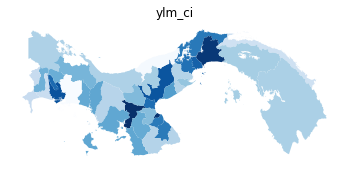

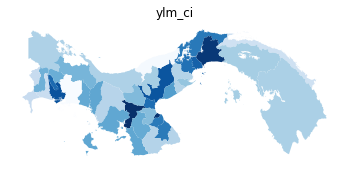

In [4]:
for indicator in ['ylm_ci', 'ylm_ci']:
    # Read indicators
    indicators = get_indicators(collection='census', level=level)

    # filter indicator
    data = indicators[(indicators.indicator==indicator) & 
                        (indicators.year==2010) &
                        (indicators.area == 'Total') & (indicators.quintile == 'Total') &
                        #(indicators.sex == 'Total') & 
                        (indicators.education == 'Total') &
                        (indicators.age == 'Total') & (indicators.ethnicity == 'Total') ]

    world_map = world.merge(data, on='geolevel'+level, how="left")

    fig, ax = plt.subplots(1, 1)
    import contextily as cx
    
    
    metadata = dictionary[dictionary.indicator == indicator + '_PHC']
    if len(metadata)==0:
        label = indicator
    else:
        label = metadata['label_es']

    ax.set_axis_off();
    ax.set_title(label)
    world_map.plot(column = 'value', legend = False, 
                       ax=ax,
                       figsize = [20,10],
                       cmap='Blues') 
    plt.savefig('../data/img/level-' + str(level) + '-' + indicator + '.png', dpi=300)
    
